In [64]:
""""
Mary Abishini jerad maria thangaras
st no:500 697 390
MTH 655 assignment 1"""

'"\nMary Abishini jerad maria thangaras\nst no:500 697 390\nMTH 655 assignment 1'

In [65]:
#Estimate the 5th (see p.10 in slides for Chapter 1) and the 2nd (see p.15 in slides for Chapter 1) 
# degree polynomial regressions. Test the performance of these models similarly to how it is
#done in “Linear regression” (errTrain and errTest variables)
#to obtain the table on p.17 in slides for Chapter 1

In [66]:
# import packages
import os # enable interaction with the operating system
import pandas as pd # simplifies working with data uploaded from external source
import numpy as np # package for advanced mathematical operations and working with arrays
from sklearn.linear_model import LinearRegression # linear regression package
import matplotlib.pyplot as plt # plots package
from sklearn.preprocessing import PolynomialFeatures


In [67]:
pwd


'C:\\Users\\sinth'

In [68]:
# import the data set
data = pd.read_csv('data.csv')
print(data.head(n=10)) # print first 10 rows
data.describe()

   Age  Salary
0   25  135000
1   55  260000
2   27  105000
3   35  220000
4   60  240000
5   65  265000
6   45  270000
7   40  300000
8   50  265000
9   30  105000


,Age,Salary
count,20.000000,20.000000
mean,40.550000,197550.000000
std,13.612978,78845.935716
min,25.000000,78000.000000
25%,28.500000,127500.000000
50%,37.500000,220000.000000
75%,51.250000,265000.000000
max,65.000000,310000.000000


In [137]:
# split the data into train and test sets; also, split features (x) and targets (y)
dataTrain, dataTest = data.iloc[:10], data.iloc[10:20]
xRaw, yRaw = dataTrain.drop('Salary',axis=1), dataTrain.drop('Age',axis=1) 
xRawTest, yRawTest = dataTest.drop('Salary',axis=1), dataTest.drop('Age',axis=1)
print(dataTrain)

   Age  Salary
0   25  135000
1   55  260000
2   27  105000
3   35  220000
4   60  240000
5   65  265000
6   45  270000
7   40  300000
8   50  265000
9   30  105000


In [138]:
# normalize the feature
xMean = xRaw.mean(axis=0) # mean of training data
xStd = xRaw.std(axis=0,ddof=1) # standard deviation of training data, ddof is for n-1 in the denominator
x = (xRaw - xMean)/xStd # normalize the data 
xTest = (xRawTest - xMean)/xStd
print(xMean)


Age    43.2
dtype: float64


In [139]:
# fit the model
model = LinearRegression() # linear regression model. 
model.fit(x,yRaw)  # find the best fit
print ("Intercept:", model.intercept_[0]) # print the intercept 
print ("Slope coefficients:", model.coef_) # print the coefficients

#fit the model for degree 5 polynomial regression
poly_reg =PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(x)
X_polyTest=poly_reg5.fit_transform(xTest)
model2 = LinearRegression()
model2.fit(X_poly, yRaw)
print ("Intercept:", model2.intercept_[0]) # print the intercept 
print ("Slope coefficients:", model2.coef_) # print the coefficients

#fit the model for degree 2 polynomial regression
poly_reg =PolynomialFeatures(degree = 2)
X_poly2 = poly_reg.fit_transform(x)
X_polyTest2=poly_reg.fit_transform(xTest)
model3 = LinearRegression()
model3.fit(X_poly2, yRaw)
print ("Intercept:", model3.intercept_[0]) # print the intercept 
print ("Slope coefficients:", model3.coef_) # print the coefficients


Intercept: 216500.0
Slope coefficients: [[53999.82692409]]
Intercept: 296762.21795262746
Slope coefficients: [[      0.           -2253.49486611 -216156.04407059  132146.87061371
    93992.56445683  -61141.37992142]]
Intercept: 260087.58398797148
Slope coefficients: [[     0.          61473.79879438 -48430.64887552]]


In [140]:
# model performance Linear regression
yFitted = model.predict(x) # prediction for x values
errTrain = (yRaw-yFitted).std(ddof=1).values # std of the error (get only value, not name of the column)
print (errTrain)
yTestFitted = model.predict(xTest)
errTest = (yRawTest-yTestFitted).std(ddof=1).values
print (errTest)

# model performance for degree 5 polynomial regression
yFitted2 = model2.predict(X_poly) # prediction for x values
errTrain2 = (yRaw-yFitted2).std(ddof=1).values # std of the error (get only value, not name of the column)
print(f' The training data of  5th degree model {errTrain2} ')
yTestFitted2 = model2.predict(X_polyTest)
errTest2 = (yRawTest-yTestFitted2).std(ddof=1).values
print(f' The test data of  5th degree model {errTest2} ')

# model performance for degree 2 polynomial regression
yFitted3 = model3.predict(X_poly2) # prediction for x values
errTrain3 = (yRaw-yFitted3).std(ddof=1).values # std of the error (get only value, not name of the column)
print(f' The training data of Quadratic model {errTrain3} ')
yTestFitted3 = model3.predict(X_polyTest2)
errTest3 = (yRawTest-yTestFitted3).std(ddof=1).values
print(f' The test data of Quadratic model {errTest3} ')



[49731.13068124]
[49989.62442279]
 The training data of  5th degree model [12902.20304437] 
 The test data of  5th degree model [38793.91269025] 
 The training data of Quadratic model [32932.08272044] 
 The test data of Quadratic model [33553.77147604] 


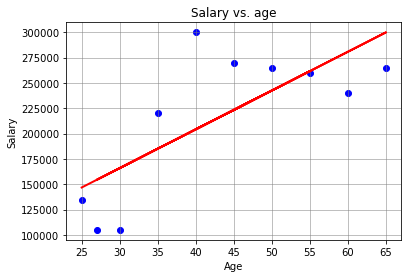

In [136]:
plt.scatter(xRaw.values, yRaw.values, color='blue') # original data
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey') # put the grid on
plt.plot(xRaw, yFitted, color='red', linewidth=2) # fitted values
plt.title('Salary vs. age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


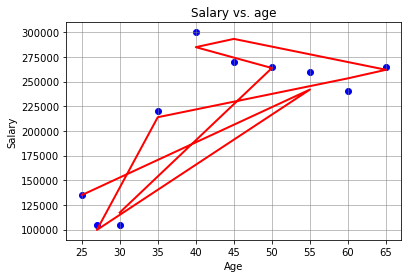

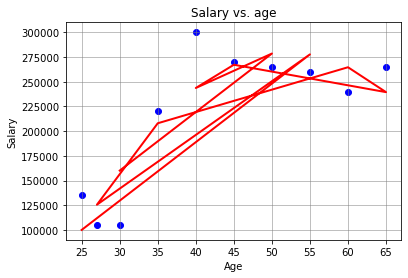

In [147]:
plt.scatter(xRaw.values, yRaw.values, color='blue') # original data
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey') # put the grid on
plt.plot(xRaw, yFitted2, color='red', linewidth=2) # fitted values
plt.title('Salary vs. age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

plt.scatter(xRaw.values, yRaw.values, color='blue') # original data
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey') # put the grid on
plt.plot(xRaw, yFitted3, color='red', linewidth=2) # fitted values
plt.title('Salary vs. age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

